In [1]:
from os import path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [2]:
# dataset path
data_dir = '/Users/saraelgayar/Downloads/Final_proj_stata/talkingdata'


In [5]:
data = pd.read_csv(path.join(data_dir, 'gender_age_train.csv'),usecols=['device_id','gender','age','group'])
app_labels = pd.read_csv(path.join(data_dir, 'app_labels.csv')) 
app_events = pd.read_csv(path.join(data_dir, 'app_events.csv'))
events = pd.read_csv(path.join(data_dir, 'events.csv'), parse_dates=['timestamp']) 
phone = pd.read_csv(path.join(data_dir,'phone_brand_device_model.csv'))
prepared_dataset = pd.read_csv(path.join(data_dir, 'Final_Dataset.csv'))


In [6]:
data.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [8]:
len(data.group.unique())

12

## EDA

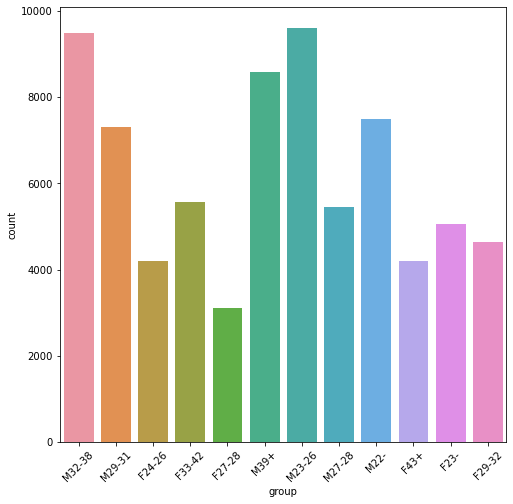

In [11]:
# plot target classes 
plt.figure(figsize=(8, 8))
ax = sns.countplot(x='group', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
None

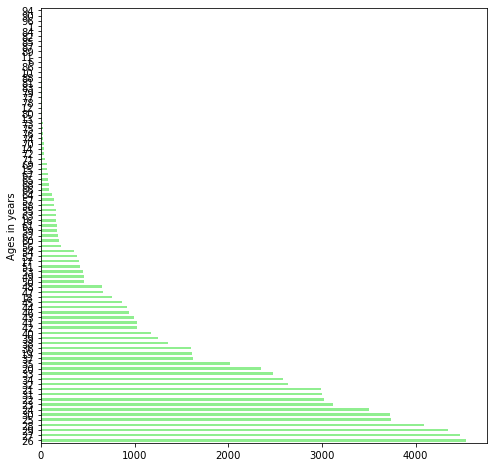

In [14]:
plt.figure(figsize=(8, 8))
data['age'].value_counts().plot(kind='barh',xlabel = 'Ages in years' , ylabel = 'Frequency',color="lightgreen" )
None

In [20]:
 data['group'].value_counts()

M23-26    9605
M32-38    9476
M39+      8581
M22-      7488
M29-31    7309
F33-42    5561
M27-28    5445
F23-      5050
F29-32    4628
F43+      4194
F24-26    4190
F27-28    3118
Name: group, dtype: int64

<AxesSubplot:xlabel='group', ylabel='count'>

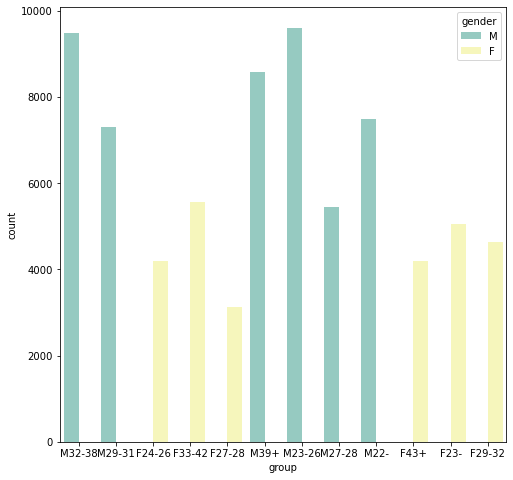

In [22]:
plt.figure(figsize=(8, 8))
sns.countplot(x ='group', hue = "gender", data = data,  palette="Set3")

From this plot we can see that the data is unbalanced, users in age groups of 20's and 30's
are higer than the other groups.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


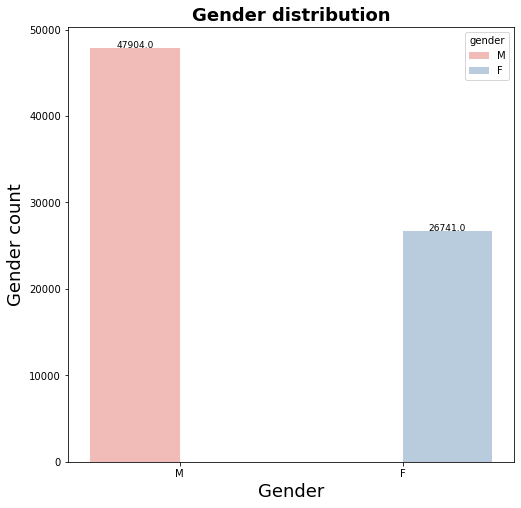

In [24]:
# plot gender distribution 
plt.figure(figsize=(8, 8))
ax = sns.countplot(x='gender', data=data, hue='gender', palette= 'Pastel1')
ax.set_title('Gender distribution',fontsize = 18, fontweight='bold' )
ax.set_xlabel('Gender', fontsize = 18)
ax.set_ylabel('Gender count', fontsize = 18)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.25,rect.get_height(),horizontalalignment='center', fontsize = 9)

In [25]:
print('Total observations: ',len(data))

Total observations:  74645


In [26]:

data['gender'].value_counts()

M    47904
F    26741
Name: gender, dtype: int64

In [27]:
F = 26741 / 74645
M = 47904 / 74645
print('Percent of female: ',F)
print('Percent of female: ',M)

Percent of female:  0.35824234710965236
Percent of female:  0.6417576528903477


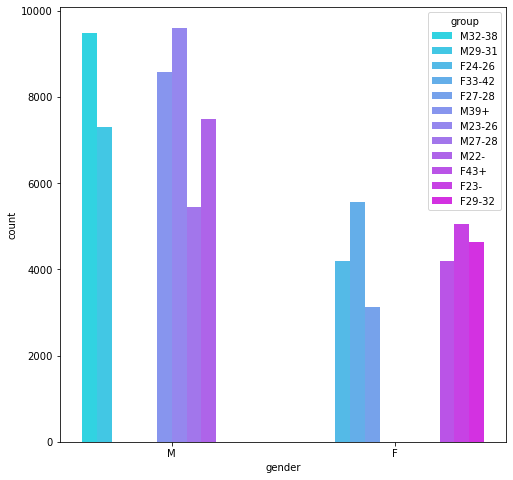

In [29]:
plt.figure(figsize=(8, 8))
sns.countplot(data = data
            ,x = 'gender'
            ,hue = 'group'
            ,palette = 'cool'
            )
None

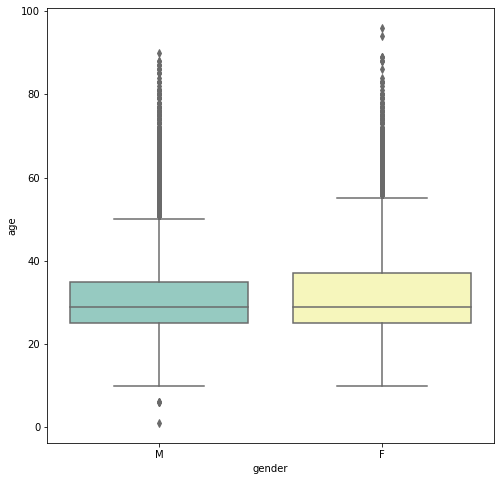

In [30]:
# Plot Age vs Gender in the dataset
plt.figure(figsize=(8, 8))
ax = sns.boxplot(x="gender", y="age",
                 data=data, palette="Set3")

In this population men are more than female users.

/Users/saraelgayar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


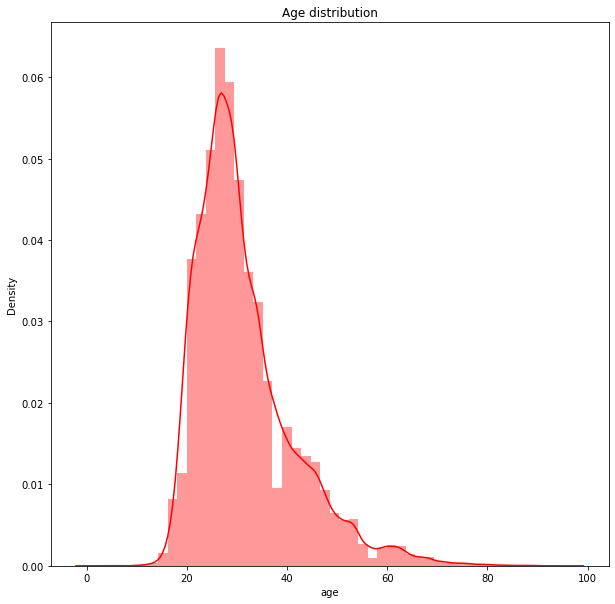

In [32]:
plt.figure(figsize=(10, 10))
(sns.distplot(data['age'], color="red")).set_title('Age distribution')

None

In [223]:
data['age'].unique()

array([35, 30, 24, 36, 38, 33, 31, 37, 28, 32, 48, 75, 39, 25, 27, 29, 34,
       22, 26, 47, 44, 21, 42, 64, 46, 23, 20, 41, 43, 51, 49, 53, 59, 45,
       50, 70, 67, 19, 52, 40, 63, 60, 61, 78, 56, 65, 58, 17, 16, 18, 71,
       54, 76, 62, 73, 66, 55, 57, 83, 84, 81, 80, 79, 77, 74, 13, 68, 89,
       87, 69, 88, 72, 82, 90, 96, 15,  1, 12, 14, 10, 85, 86, 11,  6, 94])

In [37]:

ages = data['age'].value_counts()
print(ages[:15])


26    4540
27    4476
29    4343
28    4087
25    3740
30    3730
24    3501
23    3115
22    3018
31    2996
21    2994
32    2641
34    2586
33    2481
20    2349
Name: age, dtype: int64


In [36]:
print(ages[65:85])

12    14
78    13
77    13
79    13
83    11
81    10
88     5
10     5
86     4
6      4
11     4
89     3
87     3
85     3
82     2
84     2
1      1
96     1
90     1
94     1
Name: age, dtype: int64


From the above plot for Age distribution we can see that the average age is in 20's

In [42]:
#translation brand name
english_chinese = {"三星": "samsung","天语": "Ktouch", "海信": "hisense", "联想": "lenovo", "欧比": "obi",
                                "爱派尔": "ipair", "努比亚": "nubia", "优米": "youmi", "朵唯": "dowe", "黑米": "heymi",
                                "锤子": "hammer", "酷比魔方": "koobee", "美图": "meitu", "尼比鲁": "nibilu", "一加": "oneplus",
                                "优购": "yougo", "诺基亚": "nokia", "糖葫芦": "candy", "中国移动": "ccmc", "语信": "yuxin",
                                "基伍": "kiwu", "青橙": "greeno", "华硕": "asus", "夏新": "panasonic", "维图": "weitu",
                                "艾优尼": "aiyouni", "摩托罗拉": "moto", "乡米": "xiangmi", "米奇": "micky", "大可乐": "bigcola",
                                "沃普丰": "wpf", "神舟": "hasse", "摩乐": "mole", "飞秒": "fs", "米歌": "mige", "富可视": "fks",
                                "德赛": "desci", "梦米": "mengmi", "乐视": "lshi", "小杨树": "smallt", "纽曼": "newman",
                                "邦华": "banghua", "E派": "epai", "易派": "epai", "普耐尔": "pner", "欧新": "ouxin", "西米": "ximi",
                                "海尔": "haier", "波导": "bodao", "糯米": "nuomi", "唯米": "weimi", "酷珀": "kupo", "谷歌": "google",
                                "昂达": "ada", "聆韵": "lingyun", "小米": "Xiaomi", "华为": "Huawei", "魅族": "Meizu", "中兴": "ZTE",
                                "酷派": "Coolpad", "金立": "Gionee", "SUGAR": "SUGAR", "OPPO": "OPPO", "vivo": "vivo", "HTC": "HTC",
                                "LG": "LG", "ZUK": "ZUK", "TCL": "TCL", "LOGO": "LOGO", "SUGAR": "SUGAR", "Lovme": "Lovme",
                                "PPTV": "PPTV", "ZOYE": "ZOYE", "MIL": "MIL", "索尼" : "Sony", "欧博信" : "Opssom", "奇酷" : "Qiku",
                                "酷比" : "CUBE", "康佳" : "Konka", "亿通" : "Yitong", "金星数码" : "JXD", "至尊宝" : "Monkey King",
                                "百立丰" : "Hundred Li Feng", "贝尔丰" : "Bifer", "百加" : "Bacardi", "诺亚信" : "Noain", 
                                "广信" : "Kingsun", "世纪天元" : "Ctyon", "青葱" : "Cong", "果米" : "Taobao", "斐讯" : "Phicomm",
                                "长虹" : "Changhong", "欧奇" : "Oukimobile", "先锋" : "XFPLAY", "台电" : "Teclast", "大Q" : "Daq",
                                "蓝魔" : "Ramos", "奥克斯" : "AUX", "索尼" : "Sony", "欧博信" : "Opssom", "奇酷" : "Qiku",
                                "酷比" : "CUBE", "康佳" : "Konka", "亿通" : "Yitong", "金星数码" : "JXD", "至尊宝" : "Monkey King",
                                "百立丰" : "Hundred Li Feng", "贝尔丰" : "Bifer", "百加" : "Bacardi", "诺亚信" : "Noain",
                                "广信" : "Kingsun", "世纪天元" : "Ctyon", "青葱" : "Cong", "果米" : "Taobao", "斐讯" : "Phicomm",
                                "长虹" : "Changhong", "欧奇" : "Oukimobile", "先锋" : "XFPLAY", "台电" : "Teclast", "大Q" : "Daq", 
                                "蓝魔" : "Ramos", "奥克斯" : "AUX", "飞利浦": "Philips", "智镁": "Zhimei", "惠普": "HP",
                                "原点": "Origin", "戴尔": "Dell", "碟米": "Diemi", "西门子": "Siemens", "亚马逊": "Amazon",
                                "宏碁": "Acer",
                                '世纪星': "UB1", '丰米': "UB2", '优语':'UB3', '凯利通': "UB4", '唯比': "UB5", '嘉源': "UB6",
                                 '大显': "UB7", '天宏时代': "UB8", '宝捷讯': 'UB9','帷幄': 'UB10', '德卡诺': 'UB11',
                                '恒宇丰': 'UB12', '本为': 'UB13', '极米': 'UB14', '欧乐迪': 'UB15', '欧乐酷': 'UB16',
                                '欧沃': 'UB17', '瑞米': 'UB18', '瑞高': 'UB19', '白米': 'UB20', '虾米': 'UB21', '赛博宇华': 'UB22',
                                '首云': 'UB23', '鲜米': 'UB24'}

#Translate 
phone['phone_brand'].replace(english_chinese, inplace=True)

# display
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187245 entries, 0 to 187244
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   device_id     187245 non-null  int64 
 1   phone_brand   187245 non-null  object
 2   device_model  187245 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.3+ MB


In [43]:
#app_labels.app_id.unique()
top15_brand = phone['phone_brand'].value_counts().head(25)
top15_brand



Xiaomi     43210
samsung    34286
Huawei     32564
vivo       14395
OPPO       14289
Meizu      11853
Coolpad     8407
lenovo      6761
Gionee      2768
HTC         2682
ZTE         2096
lshi        1930
Sony        1821
nubia       1144
LG           763
ccmc         671
TCL          586
dowe         544
hammer       535
youmi        492
hisense      489
oneplus      438
yuxin        396
Qiku         378
Ktouch       376
Name: phone_brand, dtype: int64

In [44]:
phone['phone_brand'].value_counts().sum()

187245

[Text(0, 0, 'Xiaomi'),
 Text(1, 0, 'samsung'),
 Text(2, 0, 'SUGAR'),
 Text(3, 0, 'Huawei'),
 Text(4, 0, 'vivo'),
 Text(5, 0, 'Meizu'),
 Text(6, 0, 'Coolpad'),
 Text(7, 0, 'Ktouch'),
 Text(8, 0, 'OPPO'),
 Text(9, 0, 'ZTE'),
 Text(10, 0, 'Gionee'),
 Text(11, 0, 'lenovo'),
 Text(12, 0, 'hisense'),
 Text(13, 0, 'Sony'),
 Text(14, 0, 'LG'),
 Text(15, 0, 'HTC'),
 Text(16, 0, 'CUBE'),
 Text(17, 0, 'Konka'),
 Text(18, 0, 'Qiku'),
 Text(19, 0, 'Opssom'),
 Text(20, 0, 'obi'),
 Text(21, 0, 'TCL'),
 Text(22, 0, 'ipair'),
 Text(23, 0, 'nubia'),
 Text(24, 0, 'youmi'),
 Text(25, 0, 'LOGO'),
 Text(26, 0, 'dowe'),
 Text(27, 0, 'heymi'),
 Text(28, 0, 'hammer'),
 Text(29, 0, 'koobee'),
 Text(30, 0, 'meitu'),
 Text(31, 0, 'nibilu'),
 Text(32, 0, 'oneplus'),
 Text(33, 0, 'yougo'),
 Text(34, 0, 'nokia'),
 Text(35, 0, 'candy'),
 Text(36, 0, 'ccmc'),
 Text(37, 0, 'yuxin'),
 Text(38, 0, 'kiwu'),
 Text(39, 0, 'greeno'),
 Text(40, 0, 'asus'),
 Text(41, 0, 'panasonic'),
 Text(42, 0, 'weitu'),
 Text(43, 0, 'aiyoun

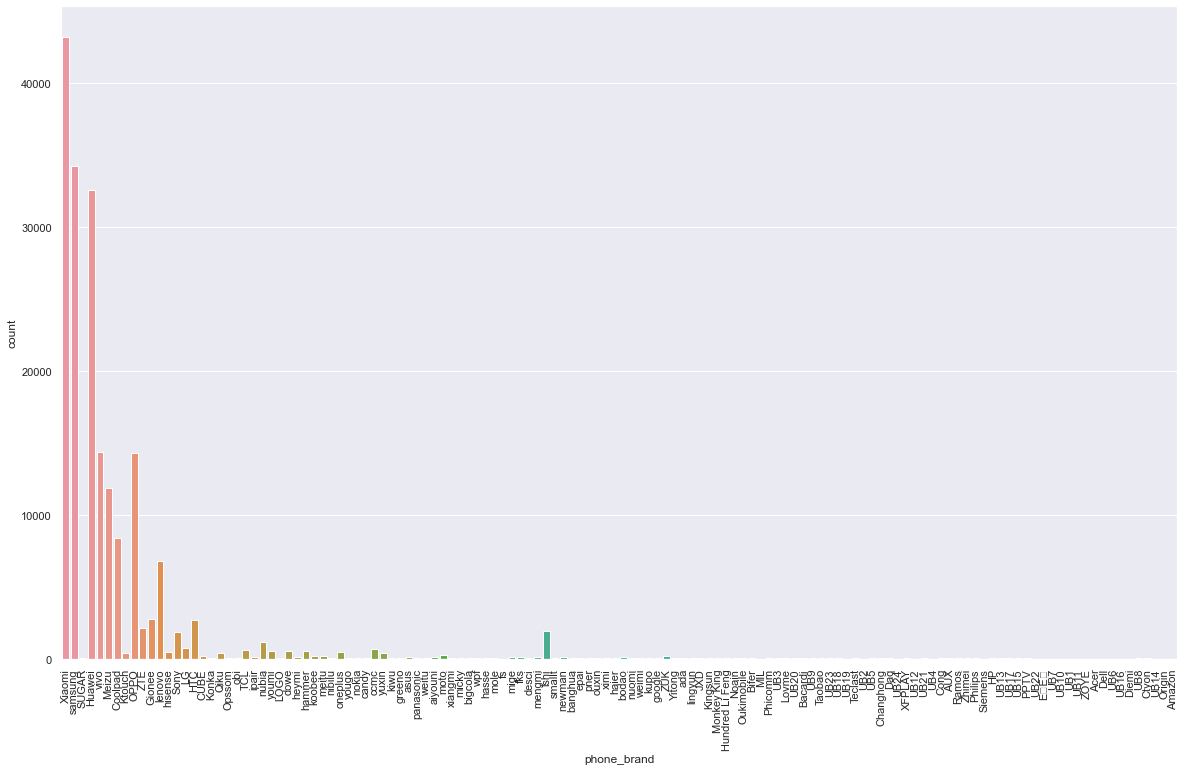

In [45]:
# plot app labels  
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(20,12)})
ax = sns.countplot(x='phone_brand', data=phone)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


Examining the most used applications 

In [46]:
apps_label_id = app_labels.label_id.unique()
apps_label_id

array([ 251,  406,  407,  256,  261,  253,  259,  564,  562,  551,  558,
        565,  566,  559,  563,  552,  555,  568,  553,  263,  260,  405,
        688,  689,  690,  691,  254,  257,  549,  548,  262,  252,  706,
        714,  723,  713,  719,  716,  707,  715,  721,  724,  720,  717,
        710,  718,  711,  705,  709,  712,  708,  722,  704,  302,  303,
        316,  317,  326,  318,  306,  751,  756,  731,  747,  789,  737,
        770,  762,  755,  761,  752,  757,  758,  760,  732,  748,  749,
        788,  791,  792,  790,  771,  738,  740,  765,  759,  793,  736,
        734,  772,  744,  763,  735,  786,  787,  785,  783,  775,  776,
        777,  774,  773,  781,  782,  780,  779,  778,  730,  255,  258,
        810,  800,  797,  796,  813,  820,  801,  821,  802,  811,  808,
        804,  826,  823,  803,  812,  798,  805,  809,  806,  822,  819,
        829,  807,  827,  828,  815,  816,  824,  795,  818,  825,  814,
        794,  817,  839,  843,  841,  840,  844,  8

In [53]:
# using merge function by setting how='inner'
merged_data = pd.merge(data, events, 
                   on='device_id', 
                   how='inner')
  


In [54]:
# displaying result
merged_data[:8]

,device_id,gender,age,group,event_id,timestamp,longitude,latitude
0,-8260683887967679142,M,35,M32-38,2479656,2016-05-01 14:23:37,0.00,0.00
1,7477216237379271436,F,37,F33-42,280934,2016-05-04 14:10:03,119.57,31.75
2,7477216237379271436,F,37,F33-42,363585,2016-05-04 14:13:30,119.57,31.75
3,7477216237379271436,F,37,F33-42,935225,2016-05-06 18:51:15,0.00,0.00
4,7477216237379271436,F,37,F33-42,1551108,2016-05-04 14:09:29,119.57,31.75
5,7477216237379271436,F,37,F33-42,1901681,2016-05-04 14:10:00,119.57,31.75
6,7477216237379271436,F,37,F33-42,1969680,2016-05-04 14:08:17,119.59,31.75
7,7477216237379271436,F,37,F33-42,2616450,2016-05-04 14:08:23,119.57,31.75


In [55]:
merged_data = pd.merge(merged_data, app_events, 
                   on='event_id', 
                   how='inner')

In [57]:
merged_data.head(8)

,device_id,gender,age,group,event_id,timestamp,longitude,latitude,app_id,is_installed,is_active
0,-8260683887967679142,M,35,M32-38,2479656,2016-05-01 14:23:37,0.0,0.0,4287147352639325907,1,0
1,-8260683887967679142,M,35,M32-38,2479656,2016-05-01 14:23:37,0.0,0.0,-4085686983594738208,1,0
2,-8260683887967679142,M,35,M32-38,2479656,2016-05-01 14:23:37,0.0,0.0,6324194957022958681,1,0
3,-8260683887967679142,M,35,M32-38,2479656,2016-05-01 14:23:37,0.0,0.0,-8687507491028761317,1,0
4,-8260683887967679142,M,35,M32-38,2479656,2016-05-01 14:23:37,0.0,0.0,877288515501232570,1,1
5,-8260683887967679142,M,35,M32-38,2479656,2016-05-01 14:23:37,0.0,0.0,274150196071514245,1,0
6,-8260683887967679142,M,35,M32-38,2479656,2016-05-01 14:23:37,0.0,0.0,8096758179979414311,1,1
7,-8260683887967679142,M,35,M32-38,2479656,2016-05-01 14:23:37,0.0,0.0,-1442117569095077934,1,0


In [58]:
len(merged_data.app_id.unique())

13762